In [1]:
import pandas as pd
import mysql.connector
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load datasets
high_df = pd.read_csv('52WeekHigh.csv')
low_df = pd.read_csv('52WeekLow.csv')

In [3]:
high_df  #EQ (Equity Segment), BE (Book Entry), ST (Small Trading Lot), SM (Small and Medium Enterprises)

,Symbol,Series,LTP,%chng,New 52W/H price,Prev.High,Prev. High Date
0,ABINFRA,EQ,95.00,-0.11,98.00,97.00,18-Mar-2025
1,AJAXENGG,EQ,637.90,4.40,648.00,628.85,20-Feb-2025
2,AXISCADES,BE,890.00,-2.75,959.95,915.20,18-Mar-2025
3,BAJAJHCARE,EQ,708.00,4.81,745.00,719.00,06-Feb-2025
4,BAJFINANCE,EQ,8749.65,0.77,8879.00,8739.00,27-Feb-2025
5,BALAJIPHOS,ST,79.00,2.60,80.50,80.00,12-Mar-2025
6,BLUEJET,EQ,915.00,-1.51,955.45,929.05,18-Mar-2025
7,CAMLINFINE,EQ,178.78,4.92,178.80,175.50,12-Mar-2025
8,CASHIETF,EQ,1001.49,0.03,1001.49,0.00,-
9,CHAMBLFERT,EQ,589.50,3.68,591.35,588.80,06-Mar-2025


In [410]:
low_df

,Symbol,Series,LTP,%chng,New 52W/L price,Prev.Low,Prev. Low Date
0,ACCORD,SM,19.40,-4.67,19.40,20.35,12-Mar-2025
1,AGSTRA,BE,11.87,4.95,10.74,11.31,18-Mar-2025
2,AKI,BE,7.29,-0.68,6.98,7.34,18-Mar-2025
3,ASHALOG,SM,66.60,2.62,63.60,64.00,18-Mar-2025
4,AUSL,ST,29.40,5.00,27.50,27.50,03-Mar-2025
...,...,...,...,...,...,...,...
73,UNILEX,SM,47.60,-5.27,44.40,47.00,18-Mar-2025
74,VIRINCHI,EQ,23.90,3.69,22.75,22.78,17-Mar-2025
75,VLEGOV,BE,34.27,4.99,31.00,32.64,18-Mar-2025
76,WINSOME,BZ,1.75,-2.23,1.75,1.79,18-Mar-2025


In [411]:
high_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Symbol            42 non-null     object 
 1   Series            42 non-null     object 
 2   LTP               42 non-null     float64
 3   %chng             42 non-null     float64
 4   New 52W/H price   42 non-null     float64
 5   Prev.High         42 non-null     float64
 6   Prev. High Date   42 non-null     object 
dtypes: float64(4), object(3)
memory usage: 2.4+ KB


In [412]:
low_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Symbol            78 non-null     object 
 1   Series            78 non-null     object 
 2   LTP               78 non-null     float64
 3   %chng             78 non-null     float64
 4   New 52W/L price   78 non-null     float64
 5   Prev.Low          78 non-null     float64
 6   Prev. Low Date    78 non-null     object 
dtypes: float64(4), object(3)
memory usage: 4.4+ KB


In [413]:
high_df.shape

(42, 7)

In [414]:
low_df.shape

(78, 7)

In [415]:
high_df.isnull().sum()

Symbol              0
Series              0
LTP                 0
%chng               0
New 52W/H price     0
Prev.High           0
Prev. High Date     0
dtype: int64

In [416]:
low_df.isnull().sum()

Symbol              0
Series              0
LTP                 0
%chng               0
New 52W/L price     0
Prev.Low            0
Prev. Low Date      0
dtype: int64

In [417]:
high_df.head()

,Symbol,Series,LTP,%chng,New 52W/H price,Prev.High,Prev. High Date
0,ABINFRA,EQ,95.00,-0.11,98.00,97.00,18-Mar-2025
1,AJAXENGG,EQ,637.90,4.40,648.00,628.85,20-Feb-2025
2,AXISCADES,BE,890.00,-2.75,959.95,915.20,18-Mar-2025
3,BAJAJHCARE,EQ,708.00,4.81,745.00,719.00,06-Feb-2025
4,BAJFINANCE,EQ,8749.65,0.77,8879.00,8739.00,27-Feb-2025


In [418]:
high_df.tail()

,Symbol,Series,LTP,%chng,New 52W/H price,Prev.High,Prev. High Date
37,SILVER,EQ,100.51,-0.82,104.4,103.00,23-Oct-2024
38,SILVRETF,EQ,98.05,-0.87,99.2,99.10,18-Mar-2025
39,SWARAJENG,EQ,3739.80,13.83,3789.0,3470.00,27-Aug-2024
40,TAJGVK,EQ,517.85,3.23,528.1,518.85,12-Mar-2025
41,VADILALIND,EQ,5286.40,6.87,5450.0,5143.00,16-May-2024


In [4]:
low_df.head()

,Symbol,Series,LTP,%chng,New 52W/L price,Prev.Low,Prev. Low Date
0,ACCORD,SM,19.40,-4.67,19.40,20.35,12-Mar-2025
1,AGSTRA,BE,11.87,4.95,10.74,11.31,18-Mar-2025
2,AKI,BE,7.29,-0.68,6.98,7.34,18-Mar-2025
3,ASHALOG,SM,66.60,2.62,63.60,64.00,18-Mar-2025
4,AUSL,ST,29.40,5.00,27.50,27.50,03-Mar-2025


In [420]:
low_df.tail()

,Symbol,Series,LTP,%chng,New 52W/L price,Prev.Low,Prev. Low Date
73,UNILEX,SM,47.60,-5.27,44.40,47.00,18-Mar-2025
74,VIRINCHI,EQ,23.90,3.69,22.75,22.78,17-Mar-2025
75,VLEGOV,BE,34.27,4.99,31.00,32.64,18-Mar-2025
76,WINSOME,BZ,1.75,-2.23,1.75,1.79,18-Mar-2025
77,YUDIZ,SM,35.20,-4.99,35.20,37.05,18-Mar-2025


In [421]:
# MySQL Connection
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='LAXMIMEHRA1@5',
    database='stock_analysis'
)
cursor = conn.cursor()

In [422]:
# Clean column names
high_df.columns = [col.strip() for col in high_df.columns]
low_df.columns = [col.strip() for col in low_df.columns]

In [423]:
def parse_date(date_str):
    date_str = date_str.strip()
    if date_str == '-' or date_str == '':
        return None
    else:
        return datetime.strptime(date_str, '%d-%b-%Y').date()

In [424]:
# Load week_high_stocks table safely
for _, row in high_df.iterrows():
    cursor.execute("""
        INSERT INTO week_high_stocks (symbol, series, ltp, pct_change, new_52wh_price, prev_high, prev_high_date)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
    """, (
        row['Symbol'],
        row['Series'],
        float(row['LTP']),
        float(row['%chng']),
        float(row['New 52W/H price']),
        float(row['Prev.High']),
        parse_date(row['Prev. High Date'])
    ))

In [425]:
# Load week_low_stocks table safely
for _, row in low_df.iterrows():
    cursor.execute("""
        INSERT INTO week_low_stocks (symbol, series, ltp, pct_change, new_52wl_price, prev_low, prev_low_date)
        VALUES (%s, %s, %s, %s, %s, %s, %s)
    """, (
        row['Symbol'],
        row['Series'],
        float(row['LTP']),
        float(row['%chng']),
        float(row['New 52W/L price']),
        float(row['Prev.Low']),
        parse_date(row['Prev. Low Date'])
    ))

In [426]:
conn.commit()
cursor.close()
conn.close()
print("✅ Data inserted successfully!")

✅ Data inserted successfully!


In [427]:
#🚀 Python Code to Run SQL Queries
import pandas as pd
import mysql.connector

# Function to execute and fetch SQL queries
def fetch_query(sql):
    cursor = conn.cursor()
    cursor.execute(sql)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    df = pd.DataFrame(data, columns=columns)
    cursor.close()
    return df


# MySQL connection
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='LAXMIMEHRA1@5',
    database='stock_analysis'
)

In [428]:
# 1. Highs by Series
highs_by_series = fetch_query("""
    SELECT DISTINCT series, COUNT(*) AS high_count
    FROM week_high_stocks
    GROUP BY series
    ORDER BY high_count DESC;
""")

In [429]:
# 2. Lows by Series
lows_by_series = fetch_query("""
    SELECT DISTINCT series, COUNT(*) AS low_count
    FROM week_low_stocks
    GROUP BY series
    ORDER BY low_count DESC;
""")

In [430]:
# 3. Top 10 gainers
top_gainers = fetch_query("""
    SELECT DISTINCT symbol, series, pct_change, ltp
    FROM week_high_stocks
    ORDER BY pct_change DESC
    LIMIT 10;
""")

In [431]:
# 4. Top 10 losers
top_losers = fetch_query("""
    SELECT DISTINCT symbol, series, pct_change, ltp
    FROM week_low_stocks
    ORDER BY pct_change ASC
    LIMIT 10;
""")

In [432]:
conn.close()

In [433]:
# Preview results
print("Highs by Series:\n", highs_by_series)

Highs by Series:
   series  high_count
0     EQ         720
1     ST          85
2     BE          43
3     SM          42


In [434]:
print("\nLows by Series:\n", lows_by_series)


Lows by Series:
   series  low_count
0     ST        504
1     BE        399
2     SM        336
3     EQ        231
4     BZ        168


In [435]:
print("\nTop 10 Gainers:\n", top_gainers)


Top 10 Gainers:
        symbol series pct_change       ltp
0   SWARAJENG     EQ      13.83   3739.80
1  VADILALIND     EQ       6.87   5286.40
2       JSWHL     EQ       5.00  22121.60
3  CAMLINFINE     EQ       4.92    178.78
4  BAJAJHCARE     EQ       4.81    708.00
5     CHANDAN     SM       4.77    189.00
6    AJAXENGG     EQ       4.40    637.90
7  MUTHOOTFIN     EQ       3.97   2410.00
8   MOCAPITAL     EQ       3.81     31.90
9  CHAMBLFERT     EQ       3.68    589.50


In [436]:
print("\nTop 10 Losers:\n", top_losers)


Top 10 Losers:
        symbol series pct_change     ltp
0  ROCKINGDCE     SM     -11.47  312.50
1      UNILEX     SM      -5.27   47.60
2        GLFL     BE      -5.22    4.18
3  KESORAMIND     BE      -5.07    7.11
4       DHRUV     BE      -5.01   73.25
5         KTL     ST      -5.00    6.65
6      PRABHA     BE      -5.00  210.94
7      GENSOL     BE      -4.99  224.90
8       YUDIZ     SM      -4.99   35.20
9     CRAYONS     ST      -4.96   47.95


In [437]:
#For Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

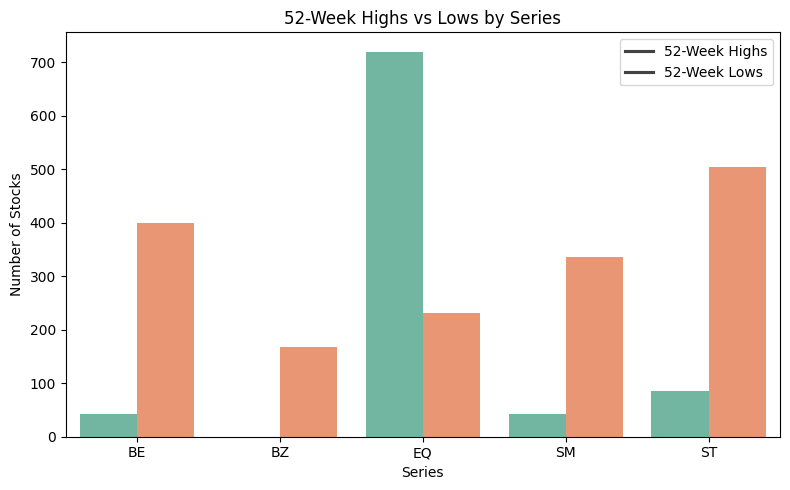

In [438]:
# 1️⃣ Bar chart: Highs vs Lows by Series
merged = highs_by_series.merge(lows_by_series, on='series',
how='outer').fillna(0)

plt.figure(figsize=(8,5))
merged_melted = merged.melt(id_vars='series', value_vars=['high_count',
'low_count'],var_name='Type', value_name='Count')

sns.barplot(x='series', y='Count', hue='Type', data=merged_melted, palette='Set2')
plt.title('52-Week Highs vs Lows by Series')
plt.xlabel('Series')
plt.ylabel('Number of Stocks')
plt.legend(['52-Week Highs', '52-Week Lows'])
plt.tight_layout()
plt.show()

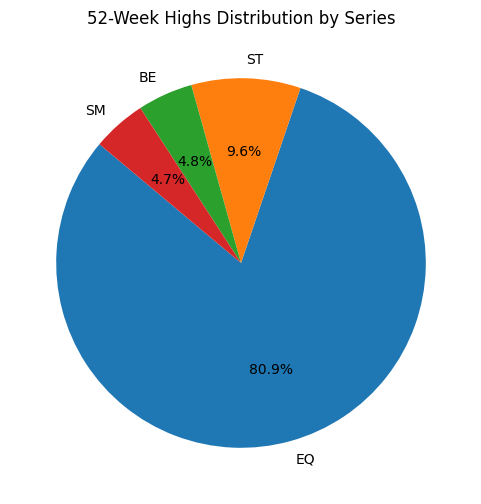

In [439]:
# 2️⃣ Pie Chart: Total highs distribution by Series
plt.figure(figsize=(6,6))
plt.pie(highs_by_series['high_count'], labels=highs_by_series['series'], autopct='%1.1f%%', startangle=140)
plt.title('52-Week Highs Distribution by Series')
plt.show()

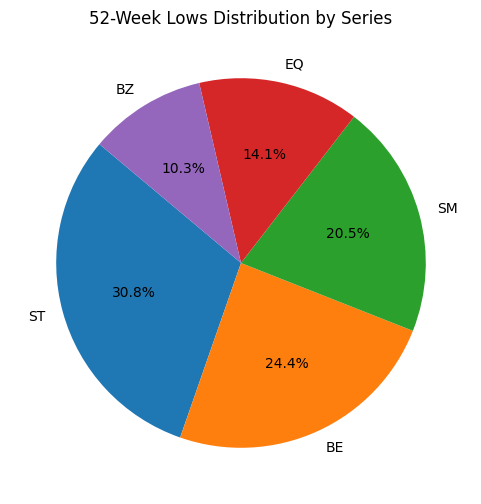

In [440]:
# Pie Chart: Total lows distribution by Series
plt.figure(figsize=(6,6))
plt.pie(lows_by_series['low_count'], labels=lows_by_series['series'], autopct='%1.1f%%', startangle=140)
plt.title('52-Week Lows Distribution by Series')
plt.show()

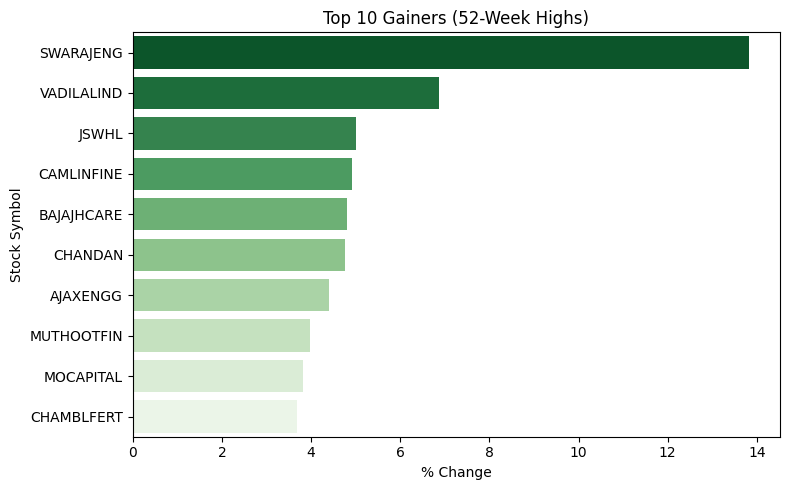

In [441]:
# 3️⃣ Horizontal Bar Chart: Top Gainers (Fixed Warning)
plt.figure(figsize=(8,5))
sns.barplot(y='symbol', x='pct_change', data=top_gainers, hue='symbol', palette='Greens_r', dodge=False)
plt.legend([],[], frameon=False)  # Hide automatic legend
plt.title('Top 10 Gainers (52-Week Highs)')
plt.xlabel('% Change')
plt.ylabel('Stock Symbol')
plt.tight_layout()
plt.show()


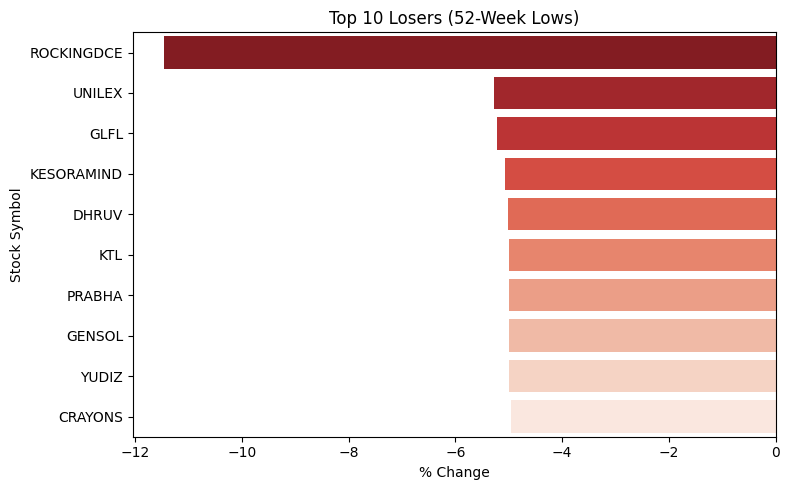

In [442]:
# Horizontal Bar Chart: Top Losers (Fixed Warning)
plt.figure(figsize=(8,5))
sns.barplot(y='symbol', x='pct_change', data=top_losers, hue='symbol', palette='Reds_r', dodge=False)
plt.legend([],[], frameon=False)
plt.title('Top 10 Losers (52-Week Lows)')
plt.xlabel('% Change')
plt.ylabel('Stock Symbol')
plt.tight_layout()
plt.show()

In [443]:
high_df.describe()

,LTP,%chng,New 52W/H price,Prev.High
count,42.000000,42.000000,42.000000,42.000000
mean,1732.028810,1.546667,1755.670000,1680.008095
std,3813.456362,3.176996,3827.736389,3721.088794
min,31.900000,-5.000000,31.910000,0.000000
25%,90.162500,0.012500,91.962500,87.222500
50%,525.925000,0.685000,545.775000,369.375000
75%,1001.120000,3.305000,1001.120000,982.270000
max,22121.600000,13.830000,22121.600000,21368.350000


In [444]:
low_df.describe()

,LTP,%chng,New 52W/L price,Prev.Low
count,78.000000,78.000000,78.000000,78.000000
mean,80.522179,-0.229872,77.314615,63.566795
std,156.117947,3.635509,151.592376,110.203943
min,1.150000,-11.470000,1.100000,0.000000
25%,7.887500,-2.857500,7.480000,7.385000
50%,29.300000,-0.335000,28.700000,25.500000
75%,78.142500,2.562500,74.687500,72.895000
max,1001.490000,5.000000,1001.470000,764.500000


In [445]:
# Calculate means
mean_high = high_df[['LTP', 'New 52W/H price', '%chng']].mean()

print("Mean of High Stocks Table:")
print(mean_high)

Mean of High Stocks Table:
LTP                1732.028810
New 52W/H price    1755.670000
%chng                 1.546667
dtype: float64


In [446]:
mean_low = low_df[['LTP', 'New 52W/L price', '%chng']].mean()

print("Mean of Low Stocks Table:")
print(mean_low)

Mean of Low Stocks Table:
LTP                80.522179
New 52W/L price    77.314615
%chng              -0.229872
dtype: float64


In [447]:
print(high_df.columns)

Index(['Symbol', 'Series', 'LTP', '%chng', 'New 52W/H price', 'Prev.High',
       'Prev. High Date'],
      dtype='object')


In [448]:
print(low_df.columns)

Index(['Symbol', 'Series', 'LTP', '%chng', 'New 52W/L price', 'Prev.Low',
       'Prev. Low Date'],
      dtype='object')


In [449]:
# For High stocks
avg_ltp_high = high_df['LTP'].mean()
high_df['diff_from_avg'] = (high_df['LTP'] - avg_ltp_high).abs()
nearest_high = high_df.sort_values('diff_from_avg').head(5)

print("Nearest to Average in High Table:\n", nearest_high[['Symbol', 'LTP', 'diff_from_avg']])

Nearest to Average in High Table:
         Symbol      LTP  diff_from_avg
12  COROMANDEL  1969.25      237.22119
27   KOTAKBANK  2019.85      287.82119
31  MUTHOOTFIN  2410.00      677.97119
8     CASHIETF  1001.49      730.53881
28   LIQUIDSBI  1000.01      732.01881


In [450]:
# For Low stocks
avg_ltp_low = low_df['LTP'].mean()
low_df['diff_from_avg'] = (low_df['LTP'] - avg_ltp_low).abs()
nearest_low = low_df.sort_values('diff_from_avg').head(5)

print("\nNearest to Average in Low Table:\n", nearest_low[['Symbol', 'LTP', 'diff_from_avg']])



Nearest to Average in Low Table:
         Symbol    LTP  diff_from_avg
46  NDLVENTURE  80.06       0.462179
64    SATIPOLY  79.35       1.172179
5     AUSOMENT  74.52       6.002179
12       DHRUV  73.25       7.272179
44       NAMAN  72.45       8.072179


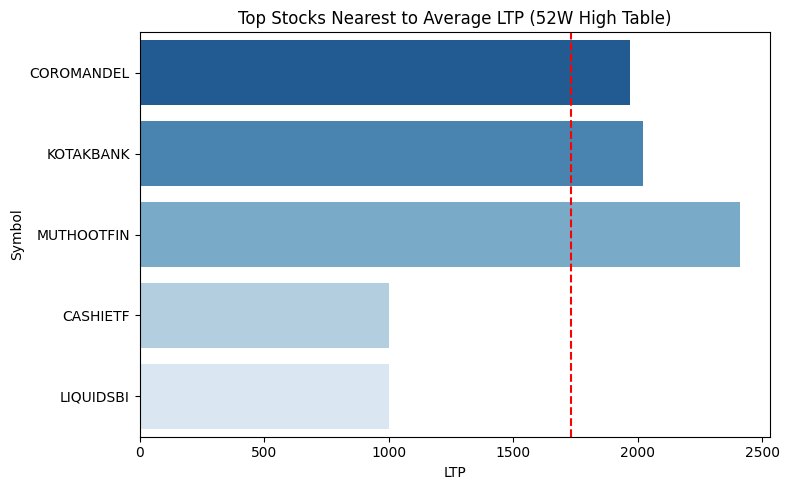

In [451]:
# For 52 week High dataset
plt.figure(figsize=(8,5))
sns.barplot(data=nearest_high, y='Symbol', x='LTP', hue='Symbol', palette='Blues_r', legend=False)
plt.axvline(avg_ltp_high, color='red', linestyle='--', label=f'Mean LTP: {avg_ltp_high:.2f}')
plt.title('Top Stocks Nearest to Average LTP (52W High Table)')
plt.xlabel('LTP')
plt.ylabel('Symbol')
plt.tight_layout()
plt.show()

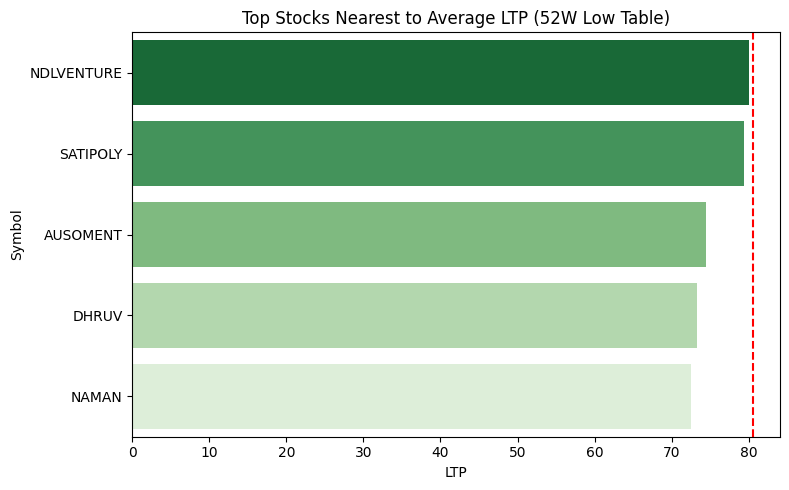

In [452]:
# For 52 week Low dataset
plt.figure(figsize=(8,5))
sns.barplot(data=nearest_low, y='Symbol', x='LTP', hue='Symbol', palette='Greens_r', legend=False)
plt.axvline(avg_ltp_low, color='red', linestyle='--', label=f'Mean LTP: {avg_ltp_low:.2f}')
plt.title('Top Stocks Nearest to Average LTP (52W Low Table)')
plt.xlabel('LTP')
plt.ylabel('Symbol')
plt.tight_layout()
plt.show()

In [453]:
# Top 10 LTP in week_high_stocks
top10_high = high_df.sort_values(by='LTP', ascending=False).head(10)
print("Top 10 Highest LTP in week_high_stocks:")
print(top10_high[['Symbol', 'LTP']])


Top 10 Highest LTP in week_high_stocks:
        Symbol       LTP
25       JSWHL  22121.60
4   BAJFINANCE   8749.65
24   IVZINGOLD   7800.50
41  VADILALIND   5286.40
21      INDIGO   4941.75
39   SWARAJENG   3739.80
30      MPSLTD   2907.00
31  MUTHOOTFIN   2410.00
27   KOTAKBANK   2019.85
12  COROMANDEL   1969.25


In [454]:
# Top 10 LTP in week_low_stocks
top10_low = low_df.sort_values(by='LTP', ascending=False).head(10)
print("\nTop 10 Highest LTP in week_low_stocks:")
print(top10_low[['Symbol', 'LTP']])


Top 10 Highest LTP in week_low_stocks:
        Symbol      LTP
6     CASHIETF  1001.49
47        NIBE   806.55
34     KOTYARK   402.75
57  ROCKINGDCE   312.50
55    RBMINFRA   276.15
54      RAPPID   243.40
18      GENSOL   224.90
50      PRABHA   210.94
32       KCEIL   186.00
26      INDOUS   157.00


In [455]:
common_df.columns

Index(['Symbol', 'Series_high', 'LTP_high', '%chng_high', 'New 52W/H price',
       'Prev.High', 'Prev. High Date', 'diff_from_avg_high', 'Series_low',
       'LTP_low', '%chng_low', 'New 52W/L price', 'Prev.Low', 'Prev. Low Date',
       'diff_from_avg_low'],
      dtype='object')

In [456]:
# Get the unique symbols from both datasets
high_symbols = set(high_df['Symbol'].unique())
low_symbols = set(low_df['Symbol'].unique())

# Find common symbols
common_symbols = high_symbols.intersection(low_symbols)

print(f"🔔 Common stocks between 52W High and 52W Low tables:")
print(common_symbols)
print(f"\nTotal common stocks: {len(common_symbols)}")

🔔 Common stocks between 52W High and 52W Low tables:
{'PRABHA', 'CASHIETF'}

Total common stocks: 2


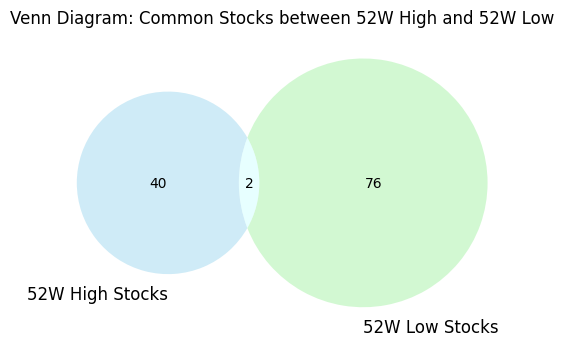

In [457]:
from matplotlib_venn import venn2

plt.figure(figsize=(6,6))
venn2([high_symbols, low_symbols], set_labels=('52W High Stocks', '52W Low Stocks'), set_colors=('skyblue', 'lightgreen'))
plt.title('Venn Diagram: Common Stocks between 52W High and 52W Low')
plt.show()

In [458]:
# Merge on symbol to get details from both
common_df = pd.merge(
    high_df[high_df['Symbol'].isin(common_symbols)],
    low_df[low_df['Symbol'].isin(common_symbols)],
    on='Symbol',
    suffixes=('_high', '_low')
)

print("\n🔎 Full details of common stocks:")
common_df[['Symbol', 'LTP_high', 'LTP_low', 'New 52W/H price', 'New 52W/L price']]


🔎 Full details of common stocks:


,Symbol,LTP_high,LTP_low,New 52W/H price,New 52W/L price
0,CASHIETF,1001.49,1001.49,1001.49,1001.47
1,PRABHA,210.94,210.94,222.05,210.94


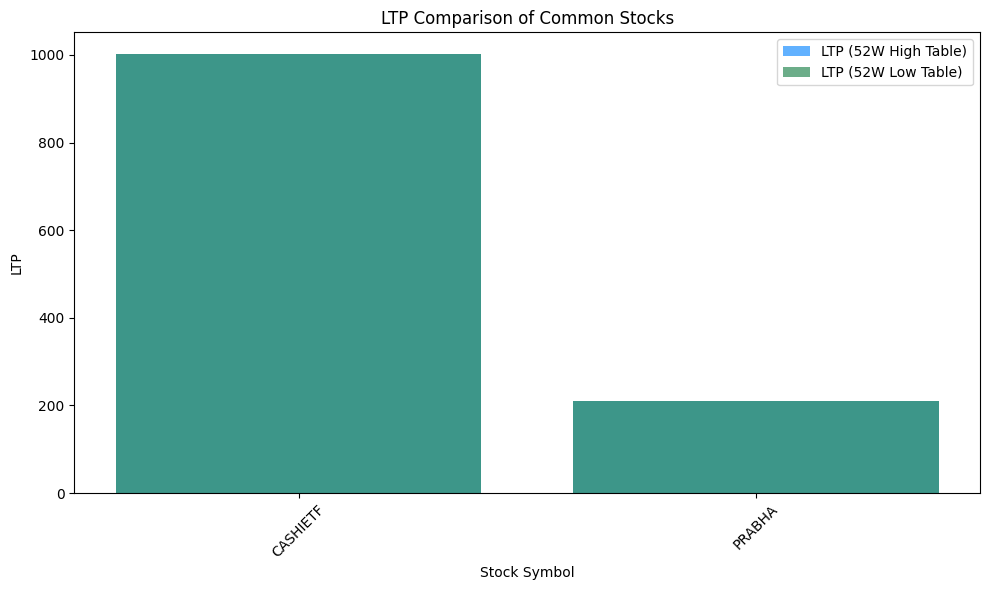

In [459]:
# Sort common_df by symbol for consistency
common_df_sorted = common_df.sort_values('Symbol')

plt.figure(figsize=(10,6))
x = common_df_sorted['Symbol']
plt.bar(x, common_df_sorted['LTP_high'], label='LTP (52W High Table)', color='dodgerblue', alpha=0.7)
plt.bar(x, common_df_sorted['LTP_low'], label='LTP (52W Low Table)', color='seagreen', alpha=0.7)
plt.xlabel('Stock Symbol')
plt.ylabel('LTP')
plt.title('LTP Comparison of Common Stocks')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [465]:
# Calculate % below 52W High
high_df['pct_below_high'] = ((high_df['New 52W/H price'] - high_df['LTP']) / high_df['New 52W/H price']) * 100

# Filter stocks within 5% of 52W High breakout
near_breakout_high = high_df[high_df['pct_below_high'] <= 1]
print("🔥 Stocks within 1% of 52W High breakout:")
print(near_breakout_high[['Symbol', 'LTP', 'New 52W/H price', 'pct_below_high']])

🔥 Stocks within 1% of 52W High breakout:
        Symbol       LTP  New 52W/H price  pct_below_high
7   CAMLINFINE    178.78           178.80        0.011186
8     CASHIETF   1001.49          1001.49        0.000000
9   CHAMBLFERT    589.50           591.35        0.312843
11   COMMITTED    218.00           219.90        0.864029
16    GOLDBEES     74.14            74.78        0.855844
17     GOLDETF     87.08            87.49        0.468625
18  GOLDETFADD     87.19            87.29        0.114561
19    GOLDIETF     76.50            77.08        0.752465
20   GOLDSHARE     74.95            75.35        0.530856
23        ITTL     34.15            34.15        0.000000
25       JSWHL  22121.60         22121.60        0.000000
28   LIQUIDSBI   1000.01          1000.01        0.000000
29   MOCAPITAL     31.90            31.91        0.031338
31  MUTHOOTFIN   2410.00          2423.50        0.557046
34   SELECTIPO     41.60            41.60        0.000000


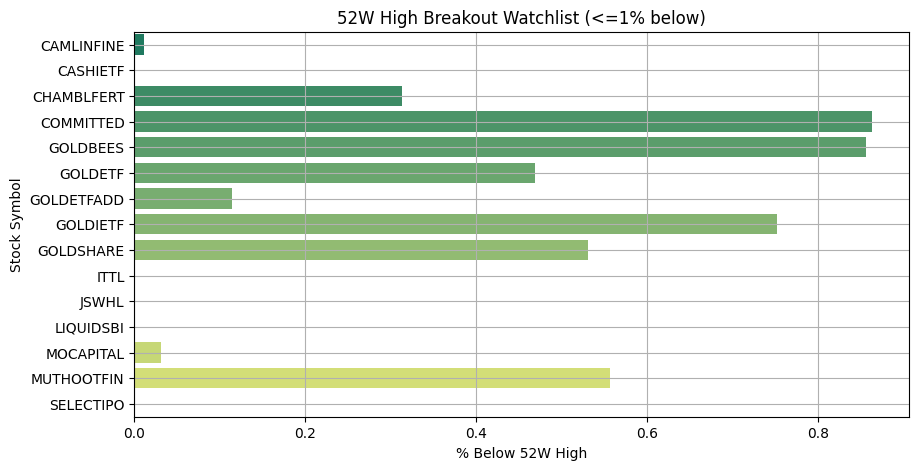

In [466]:
# Visualize 52W High breakout watchlist
plt.figure(figsize=(10,5))
sns.barplot(data=near_breakout_high, y='Symbol', x='pct_below_high',hue='Symbol', palette='summer')
plt.title("52W High Breakout Watchlist (<=1% below)")
plt.xlabel("% Below 52W High")
plt.ylabel("Stock Symbol")
plt.grid(True)
plt.show()

In [467]:
# Calculate % above 52W Low
low_df['pct_above_low'] = ((low_df['LTP'] - low_df['New 52W/L price']) / low_df['New 52W/L price']) * 100

# Filter stocks within 5% of breaking their 52W Low
near_breakout_low = low_df[low_df['pct_above_low'] <= 1]
print("⚠️ Stocks within 1% of 52W Low breakdown:")
print(near_breakout_low[['Symbol', 'LTP', 'New 52W/L price', 'pct_above_low']])

⚠️ Stocks within 1% of 52W Low breakdown:
        Symbol      LTP  New 52W/L price  pct_above_low
0       ACCORD    19.40            19.40       0.000000
6     CASHIETF  1001.49          1001.47       0.001997
9      CRAYONS    47.95            47.95       0.000000
12       DHRUV    73.25            73.25       0.000000
18      GENSOL   224.90           224.90       0.000000
20        GLFL     4.18             4.18       0.000000
25     INDIFRA    13.00            13.00       0.000000
29    JIWANRAM     7.00             7.00       0.000000
33  KESORAMIND     7.11             7.11       0.000000
36         KTL     6.65             6.65       0.000000
38     MANDEEP    20.35            20.15       0.992556
40         MEP     1.54             1.54       0.000000
42    MORARJEE     5.50             5.50       0.000000
48     NMSTEEL    29.20            29.05       0.516351
49   PHOGLOBAL    20.20            20.10       0.497512
50      PRABHA   210.94           210.94       0.000000
53  QU

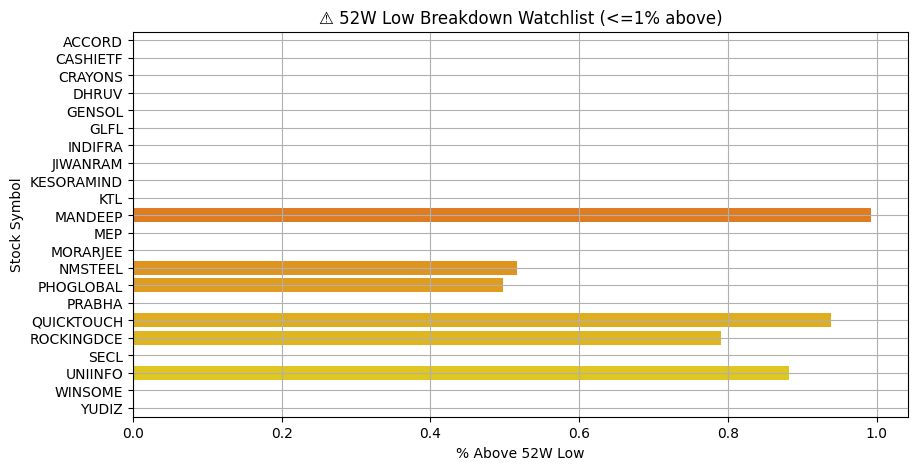

In [468]:
# Visualize 52W Low breakdown watchlist
plt.figure(figsize=(10,5))
sns.barplot(data=near_breakout_low, y='Symbol', x='pct_above_low', hue='Symbol', palette='autumn')
plt.title("⚠️ 52W Low Breakdown Watchlist (<=1% above)")
plt.xlabel("% Above 52W Low")
plt.ylabel("Stock Symbol")
plt.grid(True)
plt.show()

In [477]:
import mysql.connector
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# MySQL Connection Setup ---
def create_connection():
    try:
        conn = mysql.connector.connect(
            host="localhost",
            user="root",
            password='LAXMIMEHRA1@5',
            database='stock_analysis'   
        )
        print("✅ MySQL connection established!")
        return conn
    except mysql.connector.Error as err:
        print(f"❌ Error: {err}")
        return None

conn = create_connection()

# Helper function to run queries 
def fetch_query(sql):
    return pd.read_sql(sql, conn)


✅ MySQL connection established!


In [475]:
# Series-wise Breakdown (for 52W High dataset)
query_series_high = """
SELECT series, COUNT(*) AS stock_count, ROUND(AVG(pct_change), 2) AS avg_pct_change
FROM week_high_stocks
GROUP BY series
ORDER BY stock_count DESC;
"""
series_high_df = fetch_query(query_series_high)
print("📊 Series Breakdown for 52W Highs:")
print(series_high_df)

# Series-wise Breakdown (for 52W Low dataset) 
query_series_low = """
SELECT series, COUNT(*) AS stock_count, ROUND(AVG(pct_change), 2) AS avg_pct_change
FROM week_low_stocks
GROUP BY series
ORDER BY stock_count DESC;
"""
series_low_df = fetch_query(query_series_low)
print("📉 Series Breakdown for 52W Lows:")
print(series_low_df)

📊 Series Breakdown for 52W Highs:
  series  stock_count  avg_pct_change
0     EQ          720            1.78
1     ST           85            1.18
2     BE           43           -3.85
3     SM           42            3.84
📉 Series Breakdown for 52W Lows:
  series  stock_count  avg_pct_change
0     ST          504            0.72
1     BE          399           -0.31
2     SM          336           -1.35
3     EQ          231            0.84
4     BZ          168           -2.11


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7568\1692639406.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7568\1692639406.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(sql, conn)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7568\345225534.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=series_high_df, y='series', x='stock_count', palette='Blues_d')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7568\345225534.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=series_low_df, y='series', x='stock_count', palette='Reds_d')


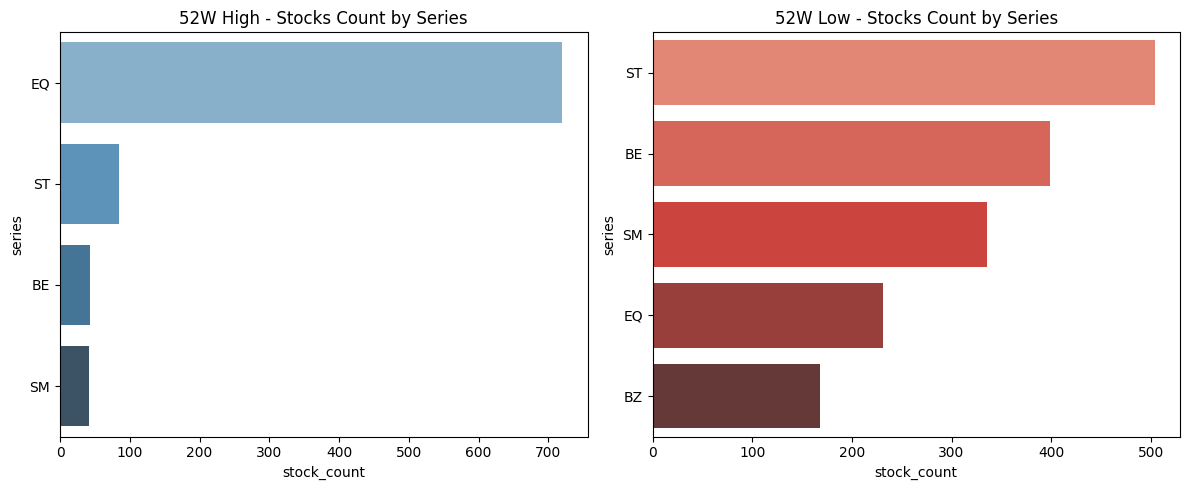

In [479]:
# Visualizations
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(data=series_high_df, y='series', x='stock_count', palette='Blues_d')
plt.title("52W High - Stocks Count by Series")

plt.subplot(1, 2, 2)
sns.barplot(data=series_low_df, y='series', x='stock_count', palette='Reds_d')
plt.title("52W Low - Stocks Count by Series")

plt.tight_layout()
plt.show()